In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# This Projekt import
# from table_gan.Data.dataset import CTGan_data_set
# from table_gan.Benchmark.benchmark import Benchmark
# from table_gan.Model.Gans.WCTGan import WCTGan
# from table_gan.Model.Gans._gan_utils import plot_gan_losses



from synthcity.plugins import Plugins

/home/nicolas/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

________________________________________________________________________________________________________________________________________________________
## Load Data

In [2]:
iris = load_iris(as_frame=True)
df = iris['frame']

________________________________________________________________________________________________________________________________________________________
## Create CTGAN

In [2]:
ctgan = Plugins().get("ctgan")

ctgan.fit(df)

NameError: name 'Plugins' is not defined

________________________________________________________________________________________________________________________________________________________
##  Create New Conditional Data

To create data given a condition, just create a DataFrame that represents the condition. 
Generating data with a condition doesn’t guarantee that all generated data will strictly 
adhere to that condition, but it will influence the generation process.

If you want to create data with no specific condition, simply pass the number of points 
you want to generate.

In [4]:
syn_df = ctgan.generate(count=160)
syn_df = syn_df.dataframe()
print(syn_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0             4.630505          2.964383           4.232536          1.464628   
1             6.225099          3.387104           5.708312          2.500000   
2             6.303080          3.190161           5.073925          2.094080   
3             6.016108          2.801008           4.219117          1.472382   
4             4.793051          3.219926           3.848355          1.584011   
..                 ...               ...                ...               ...   
155           6.241517          3.322945           5.895893          2.463696   
156           5.870113          3.242710           5.780772          2.053544   
157           5.131380          3.346165           1.383319          0.576900   
158           6.087914          3.274377           5.273986          2.087516   
159           6.248528          3.015185           5.442755          2.051120   

     target  
0         0  

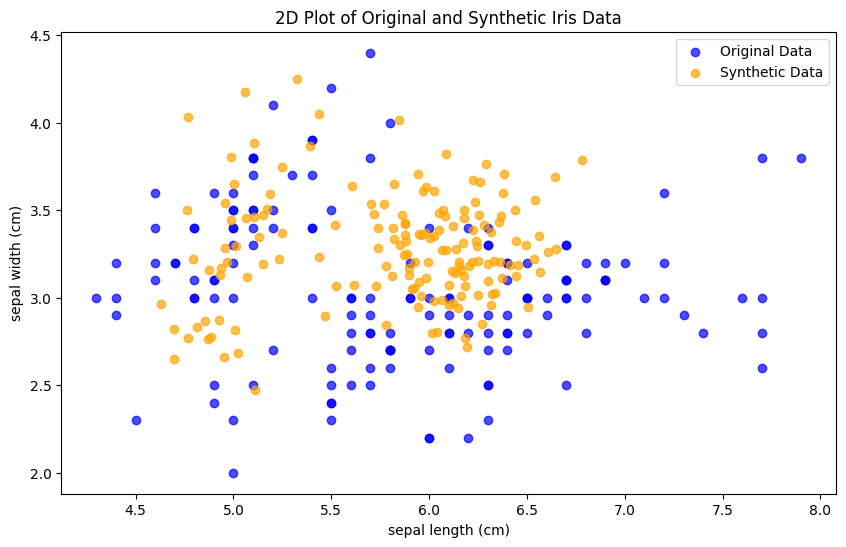

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="blue", label="Original Data", alpha=0.7)
plt.scatter(syn_df.iloc[:, 0], syn_df.iloc[:, 1], color="orange", label="Synthetic Data", alpha=0.7)
plt.xlabel(iris['feature_names'][0])
plt.ylabel(iris['feature_names'][1])
plt.title("2D Plot of Original and Synthetic Iris Data")
plt.legend()
plt.show()

________________________________________________________________________________________________________________________________________________________
## Benchmark the Generated Data
There are various ways to benchmark generated data. In the benchmark class, several methods are implemented 
that you can use to validate your generated data. However, 
it’s worth noting that GANs often struggle to accurately replicate even simple data distributions, as demonstrated in [source TODO].

In [6]:
benchmark = Benchmark()
mean_rfc = benchmark.mean_rfc(df, syn_df)

print(mean_rfc)

NameError: name 'Benchmark' is not defined